In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import svm
from sklearn.svm import SVC

In [ ]:
spam=pd.read_csv('/content/spam.csv',encoding='latin-1')

In [ ]:
spam

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [ ]:
spam.describe()

In [ ]:
spam.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [ ]:
#preprocessing
spam.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1, inplace=True)
spam.rename(columns={'v1': 'label', 'v2': 'text'}, inplace=True)
spam['label'] = spam['label'].map({'ham': 0, 'spam': 1})


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(spam['text'], spam['label'], random_state=0)

In [ ]:
# Convert text to vector representation
vectorizer = CountVectorizer()
X_train_vect = vectorizer.fit_transform(X_train)
X_test_vect = vectorizer.transform(X_test)

In [ ]:
# Train the model
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_vect, y_train)

MultinomialNB()

In [ ]:
# Test the model
y_pred = nb_classifier.predict(X_test_vect)
accuracy = accuracy_score(y_test, y_pred)

In [ ]:
print("Accuracy:", accuracy*100)

Accuracy: 98.63603732950466


[[3 1]
 [2 4]]


<Axes: >

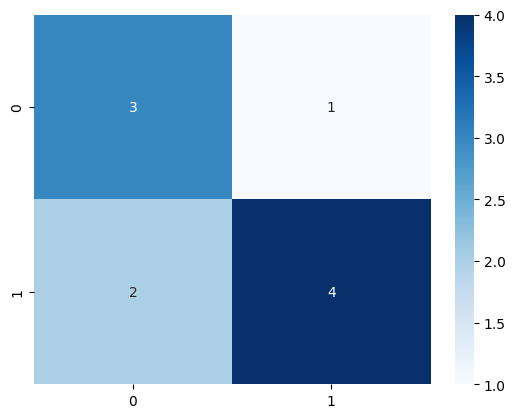

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Actual values
y_true = [1, 0, 1, 1, 0, 1, 0, 0, 1, 1]

# Predicted values
y_pred = [1, 0, 0, 1, 0, 1, 1, 0, 1, 0]

# Create confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Print confusion matrix
print(cm)

# Plot confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues')

SVM

In [ ]:
# create feature vectors using TF-IDF
vectorizer = TfidfVectorizer()
X_train_vectors = vectorizer.fit_transform(X_train)
X_test_vectors = vectorizer.transform(X_test)

# train the SVM model
svm = SVC(kernel='linear')
svm.fit(X_train_vectors, y_train)

# make predictions on the testing set
y_pred = svm.predict(X_test_vectors)

# print classification report and confusion matrix
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1196
           1       1.00      0.90      0.95       197

    accuracy                           0.99      1393
   macro avg       0.99      0.95      0.97      1393
weighted avg       0.99      0.99      0.99      1393

[[1196    0]
 [  19  178]]


In [ ]:
# Create SVM model and fit to data
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

# Make predictions on test data
y_pred = svm_model.predict(X_test)

# Evaluate model performance
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Confusion matrix:\n', confusion_matrix(y_test, y_pred))